In [2]:
import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/FoodFlix")

import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from src.d01_data.load_data import df_raw as df

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
156319,0829515322076,http://world-en.openfoodfacts.org/product/0829...,usda-ndb-import,1489073005,2017-03-09T15:23:25Z,1489073005,2017-03-09T15:23:25Z,"Sensible Portions, Pea Poppers, Hot'N Spicy",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-2.0,NaN,NaN
285047,4021457615865,http://world-en.openfoodfacts.org/product/4021...,openfoodfacts-contributors,1493663698,2017-05-01T18:34:58Z,1493663766,2017-05-01T18:36:06Z,Men sensitive deo roll on,NaN,50 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275492,3760121210791,http://world-en.openfoodfacts.org/product/3760...,stephane,1356018845,2012-12-20T15:54:05Z,1362622430,2013-03-07T02:13:50Z,Purée Pomme Myrtille sans sucres ajoutés,purée de pommes et de myrtilles sans sucres aj...,400g (4x100g),...,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,NaN,NaN
254368,3546635007382,http://world-en.openfoodfacts.org/product/3546...,nounours,1340192626,2012-06-20T11:43:46Z,1453290769,2016-01-20T11:52:49Z,Abatilles Sainte Anne &quot;la Bordelaise&quot;,eau minérale naturelle,1l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125679,0682906890673,http://world-en.openfoodfacts.org/product/0682...,usda-ndb-import,1489095957,2017-03-09T21:45:57Z,1489095957,2017-03-09T21:45:57Z,Ham & Cheese Dark Wheat Bread,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN


In [4]:
df.shape

(100000, 163)

In [5]:
# drop empty columns
df.dropna(how='all', axis=1, inplace=True)

In [6]:
df.shape

(100000, 145)

In [7]:
#drop empty rows
df.dropna(how='all', axis=0, inplace=True)

In [8]:
df.shape

(100000, 145)

In [9]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',


In [10]:
#i don't keep metadata
df = df.drop(
    columns=['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'])

In [11]:
df.shape

(100000, 139)

In [12]:
# I keep only french values
df["countries"] = df["countries"].apply(
    lambda x: "France" if re.match(r".(fr).", str(x), re.IGNORECASE) else x)
df = df.loc[df.countries == "France"]

In [13]:
df.shape

(30046, 139)

In [14]:
df.countries.unique()

array(['France'], dtype=object)

In [15]:
#i decide to keep only the usefull columns to calcul nutri-score
df_nutri_score = df[
    [ 'product_name', 
    'generic_name', 
    'brands',
    'categories',
    'nutrition_grade_fr', 
    'energy_100g', 
    'energy-from-fat_100g', 
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    '-sucrose_100g', 
    '-glucose_100g', 
    '-fructose_100g', 
    '-lactose_100g', 
    '-maltose_100g', 
    '-maltodextrins_100g', 
    'fiber_100g', 
    'proteins_100g', 
    'salt_100g', 
    'sodium_100g', 
    'fruits-vegetables-nuts_100g', 
    'nutrition-score-fr_100g', 
    'nutrition-score-uk_100g' ]]

#i don't keep countries columns because there is only french values

df_nutri_score.columns

Index(['product_name', 'generic_name', 'brands', 'categories',
       'nutrition_grade_fr', 'energy_100g', 'energy-from-fat_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g',
       '-maltose_100g', '-maltodextrins_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [16]:
df_nutri_score.shape

(30046, 24)

In [17]:
#I verify types of data

In [18]:
df_nutri_score.dtypes

product_name                    object
generic_name                    object
brands                          object
categories                      object
nutrition_grade_fr              object
energy_100g                    float64
energy-from-fat_100g           float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
-sucrose_100g                  float64
-glucose_100g                  float64
-fructose_100g                 float64
-lactose_100g                  float64
-maltose_100g                  float64
-maltodextrins_100g            float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
sodium_100g                    float64
fruits-vegetables-nuts_100g    float64
nutrition-score-fr_100g        float64
nutrition-score-uk_100g        float64
dtype: object

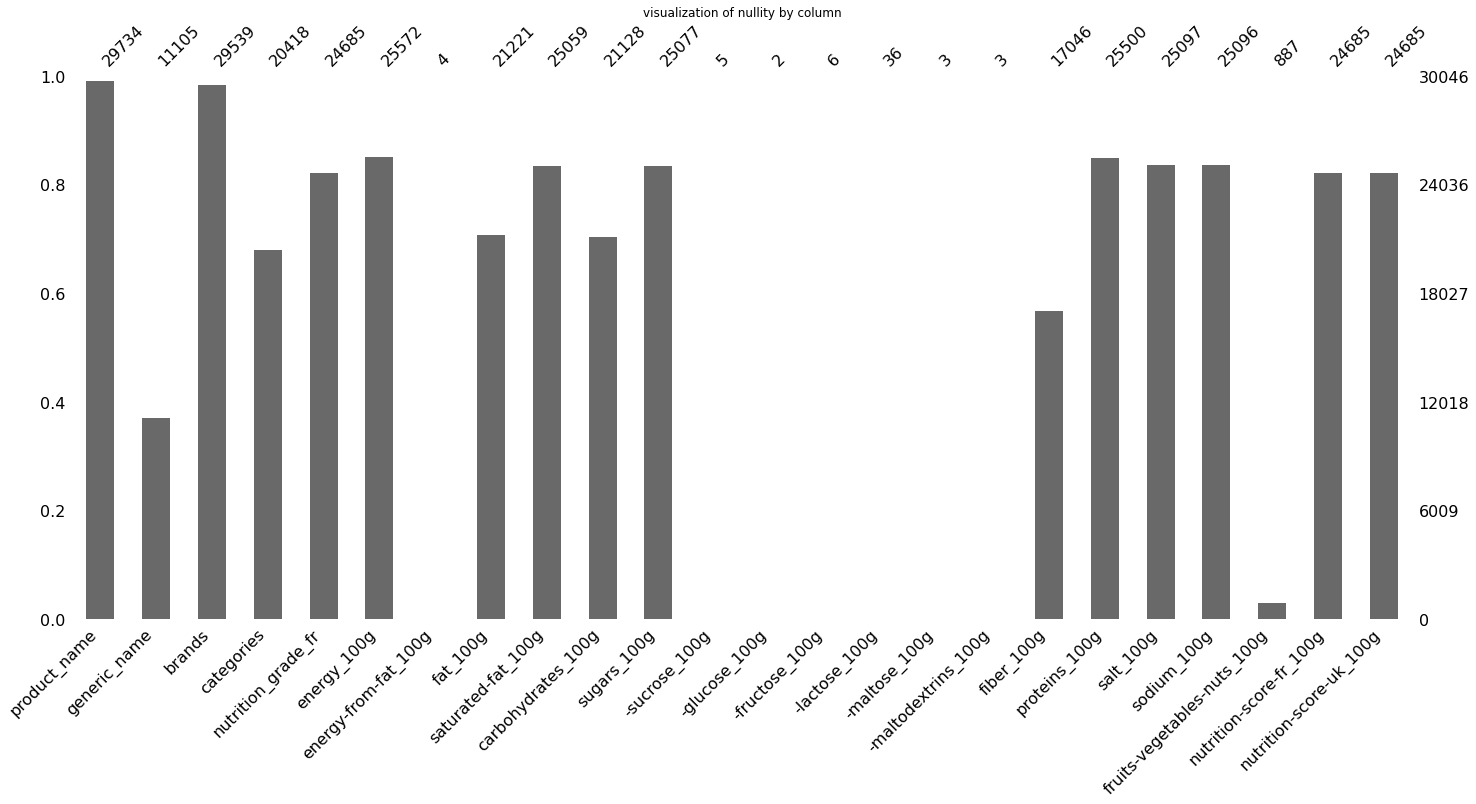

In [19]:
#I look at how many null values rest

msno.bar(df_nutri_score);
plt.title("visualization of nullity by column");


In [20]:
percentage_per_column_missing_value = (df_nutri_score.isnull().sum() * 100) / len(df_nutri_score)
print(percentage_per_column_missing_value)
df_nutri_score.shape

product_name                    1.038408
generic_name                   63.040005
brands                          1.687413
categories                     32.044199
nutrition_grade_fr             17.842641
energy_100g                    14.890501
energy-from-fat_100g           99.986687
fat_100g                       29.371630
saturated-fat_100g             16.597883
carbohydrates_100g             29.681156
sugars_100g                    16.537975
-sucrose_100g                  99.983359
-glucose_100g                  99.993344
-fructose_100g                 99.980031
-lactose_100g                  99.880184
-maltose_100g                  99.990015
-maltodextrins_100g            99.990015
fiber_100g                     43.266991
proteins_100g                  15.130134
salt_100g                      16.471411
sodium_100g                    16.474739
fruits-vegetables-nuts_100g    97.047860
nutrition-score-fr_100g        17.842641
nutrition-score-uk_100g        17.842641
dtype: float64


(30046, 24)

je supprime toutes les colonnes ayant plus de 90% de valeurs manquantes sauf 'fruits-vegetables-nuts_100g'

In [21]:
df_inter = df_nutri_score.drop(columns=['energy-from-fat_100g', '-maltodextrins_100g','-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g'])
df_inter.shape

(30046, 17)

In [22]:
# rows without name don't have to be
df2 = df_inter[df_inter['product_name'].notna()]
print(df2.shape)

(29734, 17)


In [23]:
df2.to_csv("../data/02_intermediate/intermediate.csv", index=False)